## 로지스틱 회귀문제 실습

### Q1. Iris 분류 문제

- 클래스가 `세토사와 베르시킬라 데이터만 사용(setosa=0, versicolor=1)` 독립변수로는 `꽃받침 길이(Sepal Length)와 상수항만 사용`
- StatsModels 패키지의 로지스틱 회귀모형으로 결과 예측하고 보고서를 출력
- 여기서 어떤 값이 세토사와 베르시칼라를 구분하는 `기준값(threshold)`로 나타나는 지 확인
- 이 모형에 대한 `ROC 커브를 그리고 AUC 구하기`. Scikit-Learn의 `LogisticRegression을 사용하지 않고 위에서 StatsModels로 구한 모형` 사용

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
print(dir(iris))

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [3]:
dfX = pd.DataFrame(iris['data'], columns= iris['feature_names'])
dfy = pd.DataFrame(iris['target'], columns=['target'])

df = pd.concat([dfX, dfy], axis=1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
cols = [col[:5]+'_'+col[6:-5] for col in df.columns[:-1]]
cols.append('target')

In [5]:
df.columns= cols
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
df = df[df['target'].isin([0,1])]
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [7]:
import statsmodels.api as sm

(1)

In [8]:
model = sm.Logit.from_formula('target~ sepal_length', data=df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.321056
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.5368
Time:                        17:27:29   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -27.8315      5.434     -5.122      0.000     -38.481     -17.182
sepal_length     5.1403

(2)

In [9]:
idx = np.in1d(iris['target'], [0,1])
X0 = iris['data'][idx, :1]
X = sm.add_constant(X0)
y = iris['target'][idx]

In [10]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.5368
Time:                        17:27:29   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.8315      5.434     -5.122      0.000     -38.481     -17.182
x1             5.1403      1.007      5.107      0.000       3.168       7.113


In [11]:
logit_res

In [12]:
logit_res.params

array([-27.83145099,   5.14033614])

In [13]:
-logit_res.params[0] / logit_res.params[1]

5.414325102571891

In [14]:
y_pred = logit_res.predict(X) >= 0.5

In [15]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[45,  5],
       [ 6, 44]], dtype=int64)

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



`logit_res.fittedvalues` : 판별함수 z = w^Tx 값

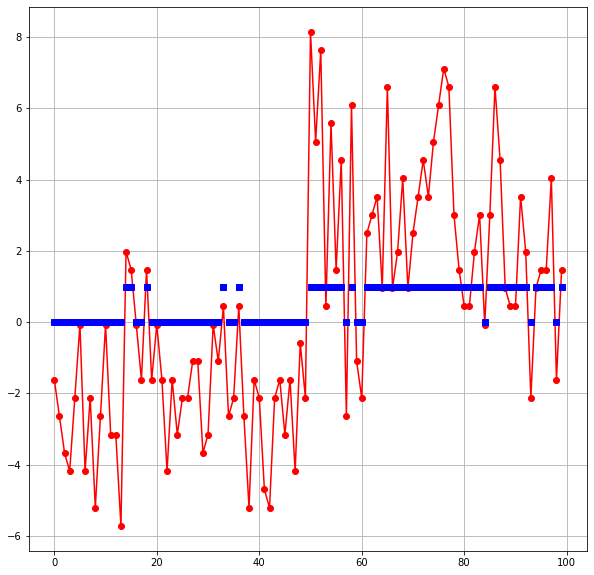

In [17]:
plt.figure(figsize=(10,10))
plt.plot(logit_res.fittedvalues, 'ro-')
plt.plot(y_pred, 'bs')
plt.grid(True)
plt.show()

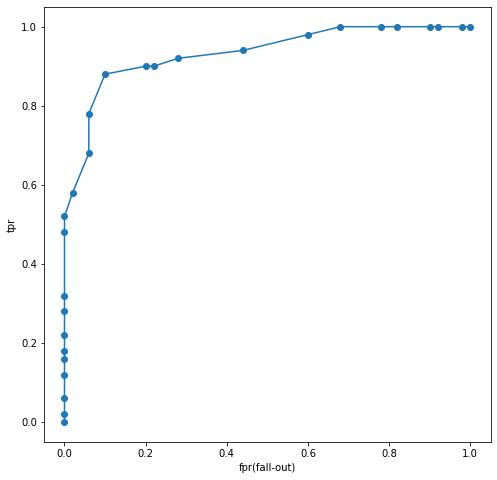

In [18]:
from sklearn.metrics import roc_curve

fpr, tpr, thr = roc_curve(y, logit_res.fittedvalues)

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, '-o')
plt.xlabel('fpr(fall-out)')
plt.ylabel('tpr')
plt.show()

In [19]:
from sklearn.metrics import auc

In [20]:
print(auc(fpr, tpr))

0.9326


### Q2. Iris 분류 문제에서 클래스 베르시칼라(versicolor)와 버지니카(virginica) 데이터만 사용(versicolor=1, virginica=2) 

- 로지스틱 회귀모형으로 결과 예측, 보고서 출력, 독립변수 모두 사용. 버지니카와 베르시칼라를 구분하는 경계선의 방정식 찾기
- 위 결과를 분류결과표와 분류결과보고서로 나타내기
- 이 모형에 대해 ROC 커브를 그리고 AUC 구하기 (Scikit-Learn의 LogisticRegression 사용하지않고 StatsModels로 구한 모형 사용)

In [21]:
from sklearn.datasets import load_iris

iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

(1)

In [22]:
idx = np.in1d(iris['target'], [1,2])

dfX = pd.DataFrame(iris['data'][idx], columns=iris['feature_names'])
dfy = pd.DataFrame(iris['target'][idx], columns=['target'])

df = pd.concat([dfX, dfy], axis=1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,7.0,3.2,4.7,1.4,1
1,6.4,3.2,4.5,1.5,1
2,6.9,3.1,4.9,1.5,1
3,5.5,2.3,4.0,1.3,1
4,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,2
96,6.3,2.5,5.0,1.9,2
97,6.5,3.0,5.2,2.0,2
98,6.2,3.4,5.4,2.3,2


In [23]:
df['target'] -= 1

In [24]:
cols = [col[:5]+'_'+col[6:-5] for col in df.columns[:-1]]
cols.append('target')
df.columns = cols

df

,sepal_length,sepal_width,petal_length,petal_width,target
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,1
96,6.3,2.5,5.0,1.9,1
97,6.5,3.0,5.2,2.0,1
98,6.2,3.4,5.4,2.3,1


In [25]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

(1)

In [26]:
model = sm.Logit.from_formula('target ~ sepal_length + sepal_width + petal_length + petal_width', data = df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.9142
Time:                        17:27:30   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -42.6378     25.708     -1.659      0.097     -93.024       7.748
sepal_length    -2.465

In [27]:
y_pred = result.predict(df) > 0.5

In [28]:
print(confusion_matrix(y, y_pred))

[[49  1]
 [ 1 49]]


In [29]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



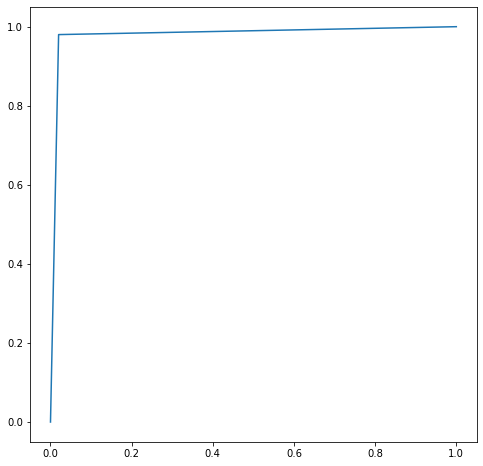

In [30]:
fpr, tpr, thr = roc_curve(df['target'], y_pred)

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr)
plt.show()

In [31]:
AUC = auc(fpr, tpr)

print(f"AUC : {AUC:.4f}")

AUC : 0.9800


(2)

In [32]:
X0 = iris['data'][idx] 
X = sm.add_constant(X0)
y = iris['target'][idx]
y -= 1

In [38]:
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                  0.9142
Time:                        17:28:04   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -42.6378     25.708     -1.659      0.097     -93.024       7.748
x1            -2.4652      2

In [39]:
result.params

array([-42.63780381,  -2.4652202 ,  -6.68088701,   9.42938515,
        18.28613689])

In [40]:
result.fittedvalues

array([-11.35448176,  -9.93261298,  -6.72538032, -10.07303645,
        -6.56384168,  -9.19183142,  -6.63968895, -21.34840371,
       -11.13567978, -11.12015002, -17.03669389, -10.19264103,
       -16.12339891,  -7.13151748, -18.09984474, -12.77564254,
        -6.62425942, -18.02785986,  -2.75868193, -16.25590176,
        -0.38534627, -14.89261207,  -1.23771599, -10.12065615,
       -13.47145129, -11.86103182,  -7.2461444 ,  -0.96408168,
        -6.9422588 , -22.77088024, -16.28422956, -19.05578176,
       -16.25650952,   1.88016338,  -6.13121538,  -8.45408862,
        -8.11821331,  -8.27345854, -14.05324086, -11.40921385,
       -10.13416218,  -8.74254469, -14.6454823 , -20.92683703,
       -11.10603624, -15.18543806, -12.68873567, -12.97840725,
       -23.50973831, -12.96358548,  22.07603495,   7.85904849,
        13.85073163,   8.17633988,  16.21553892,  19.21869114,
         2.0990656 ,  12.31168929,  11.74848363,  18.79600919,
         4.62156453,   8.2657934 ,  10.81854363,  10.32

In [41]:
y_pred = result.predict(X) >= 0.5

In [43]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



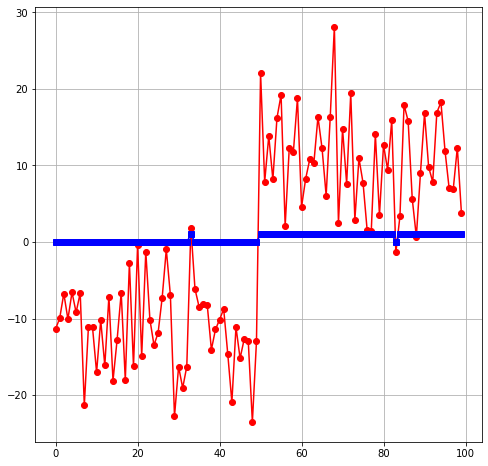

In [45]:
plt.figure(figsize=(8,8))
plt.plot(result.fittedvalues, 'ro-')
plt.plot(y_pred, 'bs-')
plt.grid(True)

AUC : 0.997200


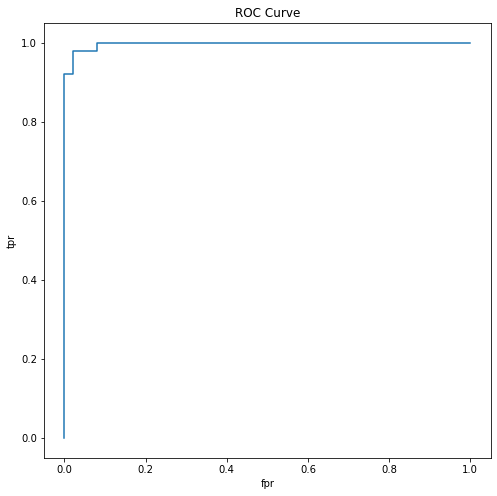

In [48]:
fpr, tpr, thr = roc_curve(y, result.fittedvalues)

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')

print(f"AUC : {auc(fpr, tpr):4f}")
